In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('abalone.data', header=None)
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info() # 无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [4]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

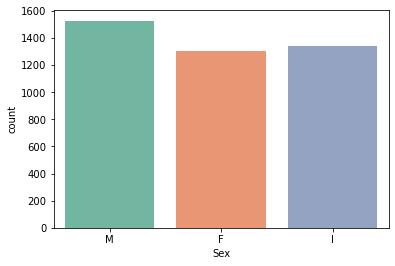

In [5]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

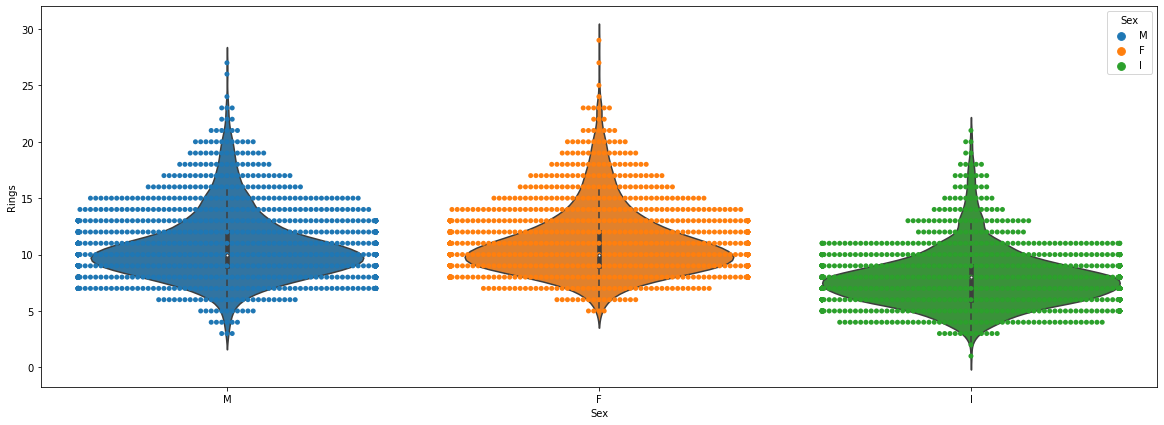

In [6]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

In [7]:
df.groupby('Sex')[["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]].mean().sort_values('Rings')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


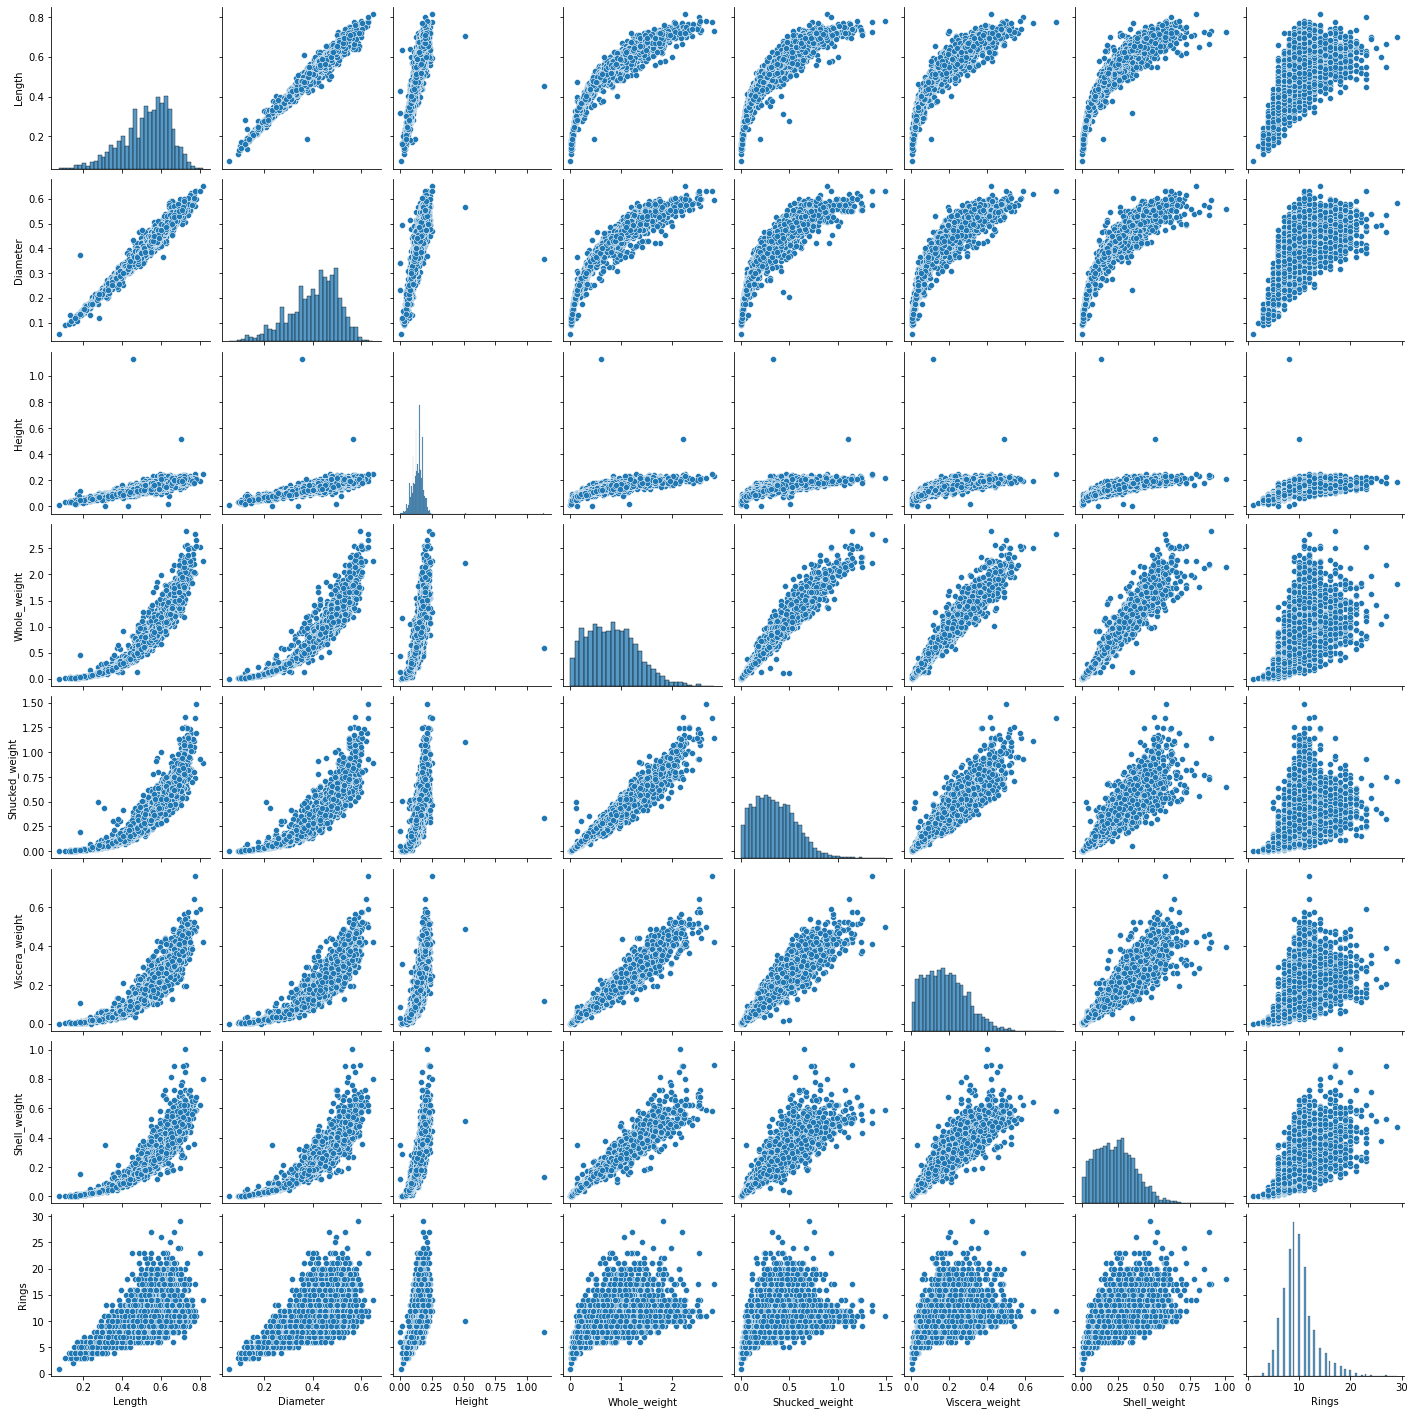

In [8]:
sns.pairplot(df.drop(["Sex"], axis=1))

In [9]:
df['Sex']=df['Sex'].replace({"I":0, "M":1, "F":2})

<AxesSubplot:>

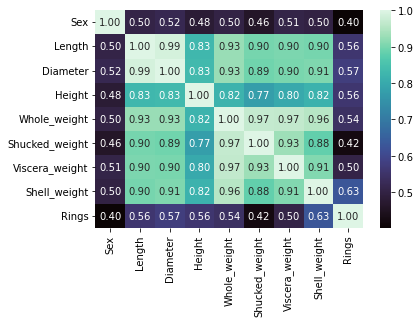

In [10]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="mako")

# 异常值处理

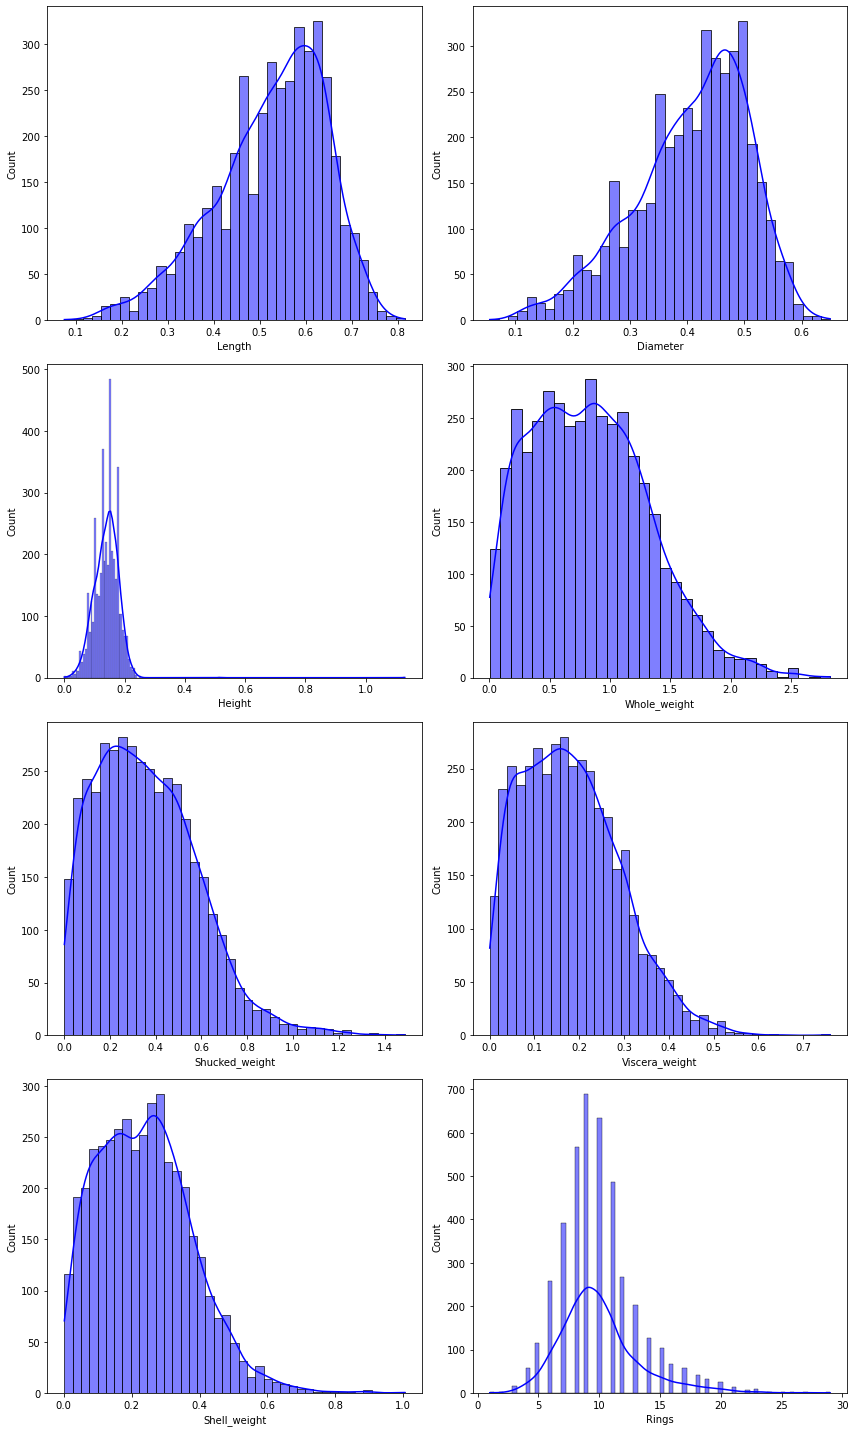

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axs = np.ravel(axs)

for i, col in enumerate(df.columns[1:]):
    plt.sca(axs[i])
    sns.histplot(x=col, data=df, kde=True, color='b')
    
plt.tight_layout()
plt.show()

In [12]:
df.loc[df.Height>0.5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1417,1,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,2,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [13]:
df = df.loc[~(df.Height>50)] # 异常值处理
df.shape

(4177, 9)

# 数据准备

In [14]:
x = df.drop(["Rings"], axis=1)
y = df["Rings"] + 1.5

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 77)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
accuracy = linear_reg.score(x_test, y_test)
print(f'Linear Regression Classifier Accuracy: {accuracy*100}')

Linear Regression Classifier Accuracy: 56.16578899600355


In [29]:
preds = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"mean squared error : {mse}")
print(f"mean absolute error : {mae}")
print(f"r2 : {r2}")

mean squared error : 4.475663509581838
mean absolute error : 1.566639518920134
r2 : 0.5616578899600355


In [30]:
linear_reg.coef_

array([ 0.28392989, -0.14570583,  1.22208948,  0.39990922,  4.47599296,
       -4.33362828, -1.19761109,  1.2158579 ])

# SVM

In [33]:
SVM = SVC()
parameters = {'C': [0.01,0.1,1,5,10,15,20], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
SVM_classifier = GridSearchCV(SVM, parameters, scoring='neg_mean_squared_error' ,cv =5, n_jobs=-1) # 网格搜索最佳参数
SVM_classifier.fit(x_train, y_train.astype(str))
SVM_classifier.best_params_

{'C': 20, 'kernel': 'rbf'}

In [34]:
svm = SVC(C=20, kernel='rbf')
svm.fit(x_train , y_train.astype(str))
accuracy = svm.score(x_test, y_test.astype(str))
print(f'SVM Classifier Accuracy: {accuracy*100}')

SVM Classifier Accuracy: 23.80382775119617


In [35]:
preds = svm.predict(x_test)
mse = mean_squared_error(y_test.astype(str), preds)
mse = mean_squared_error(y_test.astype(str), preds)
mae = mean_absolute_error(y_test.astype(str), preds)
r2 = r2_score(y_test.astype(str), preds)
print(f"mean squared error : {mse}")
print(f"mean absolute error : {mae}")
print(f"r2 : {r2}")

mean squared error : 6.338516746411483
mean absolute error : 1.673444976076555
r2 : 0.3792118645207869
